In [35]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [37]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Thu Apr 23 07:56:13 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Thu Apr 23 07:56:14 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [38]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

Recall that you trained the following model in Part A.

In [39]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


In [40]:
a_hat = model.predict(X_train)

fp_a = np.count_nonzero((Y_train != a_hat) & (a_hat == 1))
fn_a = np.count_nonzero((Y_train != a_hat) & (a_hat == 0))

print('False positives', fp_a)
print('False negatives', fn_a)

False positives 122
False negatives 1699


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [41]:
#FP: ham classified as spam
#FN: spam classified as ham

#TP: spam email gets classified as spam
#TN: ham email is classified as ham

zero_predictor_fp = 0
zero_predictor_fn = np.count_nonzero(Y_train)

In [42]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [43]:
zeros = np.zeros(len(train['spam']))

tp = np.count_nonzero((train['spam'] == zeros) & (zeros == 1))
# no true positives, given that our prediction function always evaluates to 0.
tn = np.count_nonzero((train['spam'] == zeros) & (zeros == 0))
fp = zero_predictor_fp
fn = zero_predictor_fn

zero_predictor_acc = (tp + tn) / (tp + tn + fp + fn)
zero_predictor_recall = tp / (tp + fn)

print('Accuracy:', zero_predictor_acc)
print('Recall:', zero_predictor_recall)

Accuracy: 0.7447091707706642
Recall: 0.0


In [44]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

False positives are the number of emails that are classified to be spam but are actually ham. Because our zero_predictor will always predict 0, we will have no false positive as it will never classify to 1. False negatives are the number of emails that are classified to be ham but are actually spam. By counting the number of 1s in the training array, we found this number to be 1918. 

Accuracy is the proprtion of emails correctly classified for spam and ham. A spam that is correctly classified as spam is identified as a true positive (tp) while a ham correctly identified as a ham is identified as a true negative (tn). In order to calculate accuracy, we want the proption of all true positives and negatives over all the emails classified. After calculating this, we got an accuracy rate of approximately 74%. 

Recall measures how good our zero predictor is at classifying an email as spam. In order to calculate it, we take the proportion of correctly classified spam emails over all emails classified as spam; however, because in 6a our zero predictor will never predict a 1, we end up with no true positives and a recall rate of 0%.*

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [45]:
Y_train_hat = model.predict(X_train)

tp = np.count_nonzero((Y_train == Y_train_hat) & (Y_train_hat == 1))
tn = np.count_nonzero((Y_train == Y_train_hat) & (Y_train_hat == 0))
fp = np.count_nonzero((Y_train != Y_train_hat) & (Y_train_hat == 1))
fn = np.count_nonzero((Y_train != Y_train_hat) & (Y_train_hat == 0))

logistic_predictor_precision = tp / (tp + fp)
logistic_predictor_recall = tp / (tp + fn)
logistic_predictor_far = fp / (tn + fp)

print('Logitistic Predictor Precision:', logistic_predictor_precision)
print('Logitistic Predictor Recall:', logistic_predictor_recall)
print('Logitstic Predictor Far:', logistic_predictor_far)
print('False Positives:', fp)
print('False Negatives:', fn)

Logitistic Predictor Precision: 0.6422287390029325
Logitistic Predictor Recall: 0.11418143899895725
Logitstic Predictor Far: 0.021805183199285077
False Positives: 122
False Negatives: 1699


In [46]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

*From part A, we can observe that there is a total of 122 false positives and 1699 false negatives. Therefore, there are more false negatives than false positives when using logistic regression.*

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

*(1) When we used zero_predictor, we got an accuracy score of 74.47%, compared to our logistic regression classifier, which got an accuracy score of 75.8%. Because our accuracy rate using logistic regression is greater than when we used the zero_predictor, our logistic regression classifier is better. 
(2) If we look at the words used to train the classifier, we see words, such as "drug", "bank", "prescription", "memo", and "private". The reason the classifier is performing poorly with these words is because these are common words that would be used in spam and ham emails. 
(3) Based off of its higher prediction accuracy scores, I would choose the logistic regression classifier. My reasoning refers back to (1) when I compared the logistic regression classifier score to the zero_predictor score and observed it was greater by approximately 1.33%.*

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

In [47]:
#STEP 1: Get rid of any missing values in our data. NaN values replaced with appropriate filler values.
test['id'].isnull().value_counts() #ID column has no null values
test['subject'].isnull().value_counts() #subject column has 1 null value
test['email'].isnull().value_counts() #email column has no null values

test['subject'].fillna("", inplace = True)

test['subject'].isnull().value_counts() #now, subject column has no null values

False    1000
Name: subject, dtype: int64

In [48]:
#STEP 2: We need features that will allow us to distinguish spam emails from ham emails.
#In order to find what features to use, let's explore the original_training_data dataset further to see what distinguishes a spam email from a ham email.

original_training_data.head(5)

original_training_data["id"].fillna("", inplace = True)
original_training_data["subject"].fillna("", inplace = True)
original_training_data["email"].fillna("", inplace = True)
original_training_data["spam"].fillna("", inplace = True)

spam_dataset = original_training_data[original_training_data['spam'] == 1]
ham_dataset = original_training_data[original_training_data['spam'] == 0]

print('Number of spam emails in the original training dataset:', len(spam_dataset['spam'])) #2140 spam emails
print('Number of ham emails in the original training dataset:', len(ham_dataset['spam'])) #6208 ham emails

#Observation: there is approximately 3 times more ham emails than spam emails.

Number of spam emails in the original training dataset: 2140
Number of ham emails in the original training dataset: 6208


In [49]:
train[train['email'].str.contains('option')]['spam'].value_counts()

0    424
1    118
Name: spam, dtype: int64

In [50]:
import re

original_training_data['email len'] = original_training_data['email'].str.len()
original_training_data['email len squared'] = original_training_data['email len'] ** 2 
original_training_data['word spam'] = original_training_data['email'].str.count('spam') / len(original_training_data['email'])

def count_all(df, col, word):
    df[word] = df[col].str.count(word) / len(df['email'])
    
    
words = ['3d', 'http', 'www', 'font', 'href', 'border', 'width', 'size', 'and', 'color', 'this', 
        'with', 'that', 'com', 'of', 'man',  '\n', '<br>', '<html>', '<div>','thanks', 'time', 'you',
        'free', 'url', 'money', 'business', 'need', 'message', 'body'] 

for w in range(len(words)):
    count_all(original_training_data, 'email', words[w])  

punctuation = ['!', ',', '.', '#', ':', '-', '<', '>', '=', '_', '@', '$']

for p in range(len(punctuation)):
    count_all(original_training_data, 'email', punctuation[p])
    
original_training_data['subj upper case'] = original_training_data['subject'].str.findall(
                                                                        r'[A-Z]').str.len() 

rf = ['RE', 'Re', 're', 'FW', 'Fw', 'fw', '!', '.']
for r in range(len(rf)):
    count_all(original_training_data, 'subject', rf[r])


original_training_data.head(2)

,id,subject,email,spam,email len,email len squared,word spam,3d,http,www,...,_,@,$,subj upper case,RE,Re,re,FW,Fw,fw
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0,359,128881,0.0,0.0,0.000359,0.00024,...,0.00024,0.0,0.00024,4,0.0,0.0,0.00000,0.0,0.0,0.0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0,278,77284,0.0,0.0,0.000240,0.00012,...,0.00000,0.0,0.00024,6,0.0,0.0,0.00012,0.0,0.0,0.0


In [51]:
train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

In [52]:
X_train = train.iloc[:, 4:].values
Y_train = train['spam']

In [53]:
def normalize(data):
    '''
    Args:
        data : a dataframe
    Returns:
        the normalized version of input data with NAN values filled with 0's
    '''
    new_df = data.copy()
    for i in range(len(data.columns)):        
        std = np.std(data[data.columns[i]]) 
        mean = np.mean(data[data.columns[i]]) 
        for j in range(len(data[data.columns[i]])):
            x = data[data.columns[i]][j]
            if (std == 0):
                new_df[new_df.columns[i]] = 0
            else:
                new_df[new_df.columns[i]][j] = (x - mean) / std
            j+=1
        i+=1
    return new_df

In [54]:
X_train_df = pd.DataFrame(X_train)
X_train = normalize(X_train_df)

X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.196504,-0.059846,-0.305679,-0.131974,-0.246406,-0.244760,-0.22274,-0.215701,-0.232851,-0.208681,...,0.549027,1.001234,0.019987,-0.732665,-0.265596,-0.726238,-0.501754,-0.07035,-0.087435,-0.099055
1,0.106151,-0.049559,0.417307,-0.131974,0.615130,1.004819,-0.22274,-0.215701,-0.232851,-0.208681,...,-0.299895,-0.161792,0.019987,-0.732665,-0.265596,-0.726238,-0.501754,-0.07035,-0.087435,-0.099055


In [55]:
X_val = val.iloc[:, 4:].values
Y_val = val['spam']

X_val_df = pd.DataFrame(X_val)
X_val = normalize(X_val_df)

In [56]:
from sklearn.linear_model import LogisticRegression

my_model = LogisticRegression()

my_model.fit(X_train, Y_train)

y_true = Y_val
y_pred = my_model.predict(X_val)

error = y_true - y_pred

my_accuracy = error.value_counts()[0] / len(error)
my_accuracy

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9281437125748503

In [57]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
kf.get_n_splits(X_train)
KFold(n_splits = 4, random_state = 42, shuffle = False)

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(my_model, X_train, Y_train, cv=6)
scores

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of IT

array([0.9377494 , 0.94169329, 0.94728435, 0.95047923, 0.93769968,
       0.93210863])

1)In order to find better features for my model, I utilized the value_counts() function and compared the number of times a specific word appeared in a spam versus ham email. Additionally, I implemented a similar plot we did in proj 2a to compare the frequency at which a specific word appeared in each type of email to see if there was a significant difference in distributions. 

2)Plotting the features and comparing their proportions helped me in deciding which words to include in my model. I often found myself taking out many words in which the distributions of spam versus ham emails were fairly close. While I primarily counted the number of characters in an email, I also tried counting the number of words, which brought my score down greatly. Instead in order to compare emails, it was important I divided th number of words/characters by the length of the email. This worked well in bringing my accuracy score up.

3)What was surprising when I was searching for good features is that spam emails contained much more puncutation, especially the exclamation mark, in both, the email and subject. I believe this is in order to get the attention or portray optimism to a user.

### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

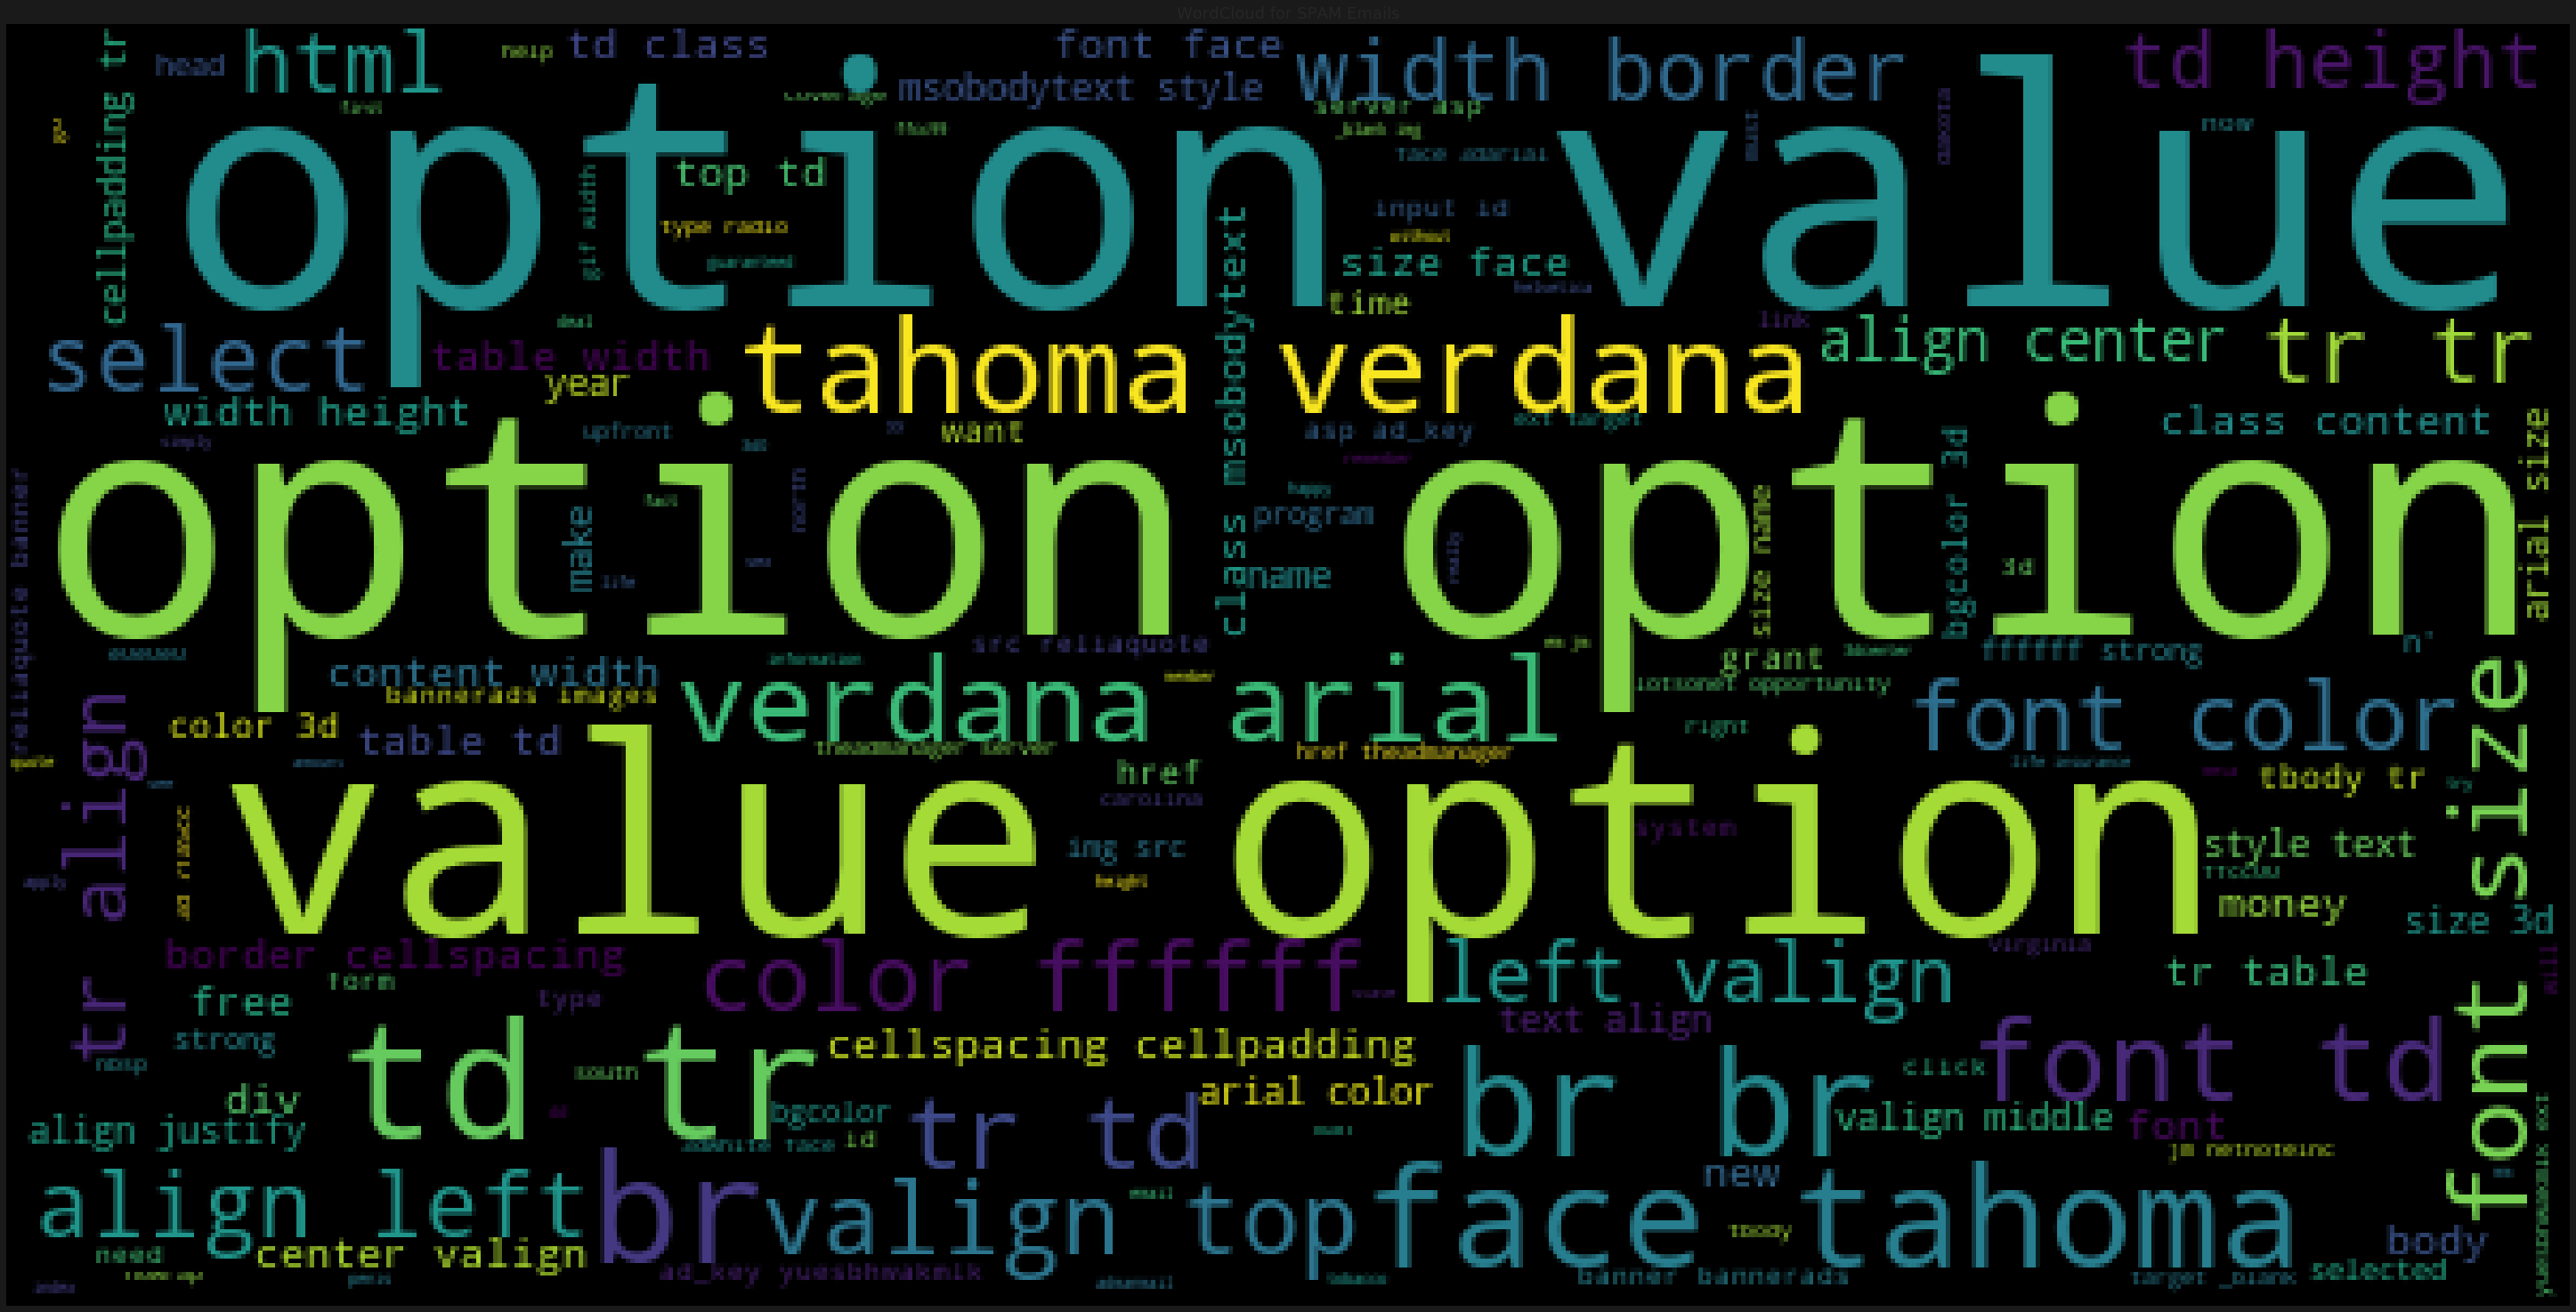

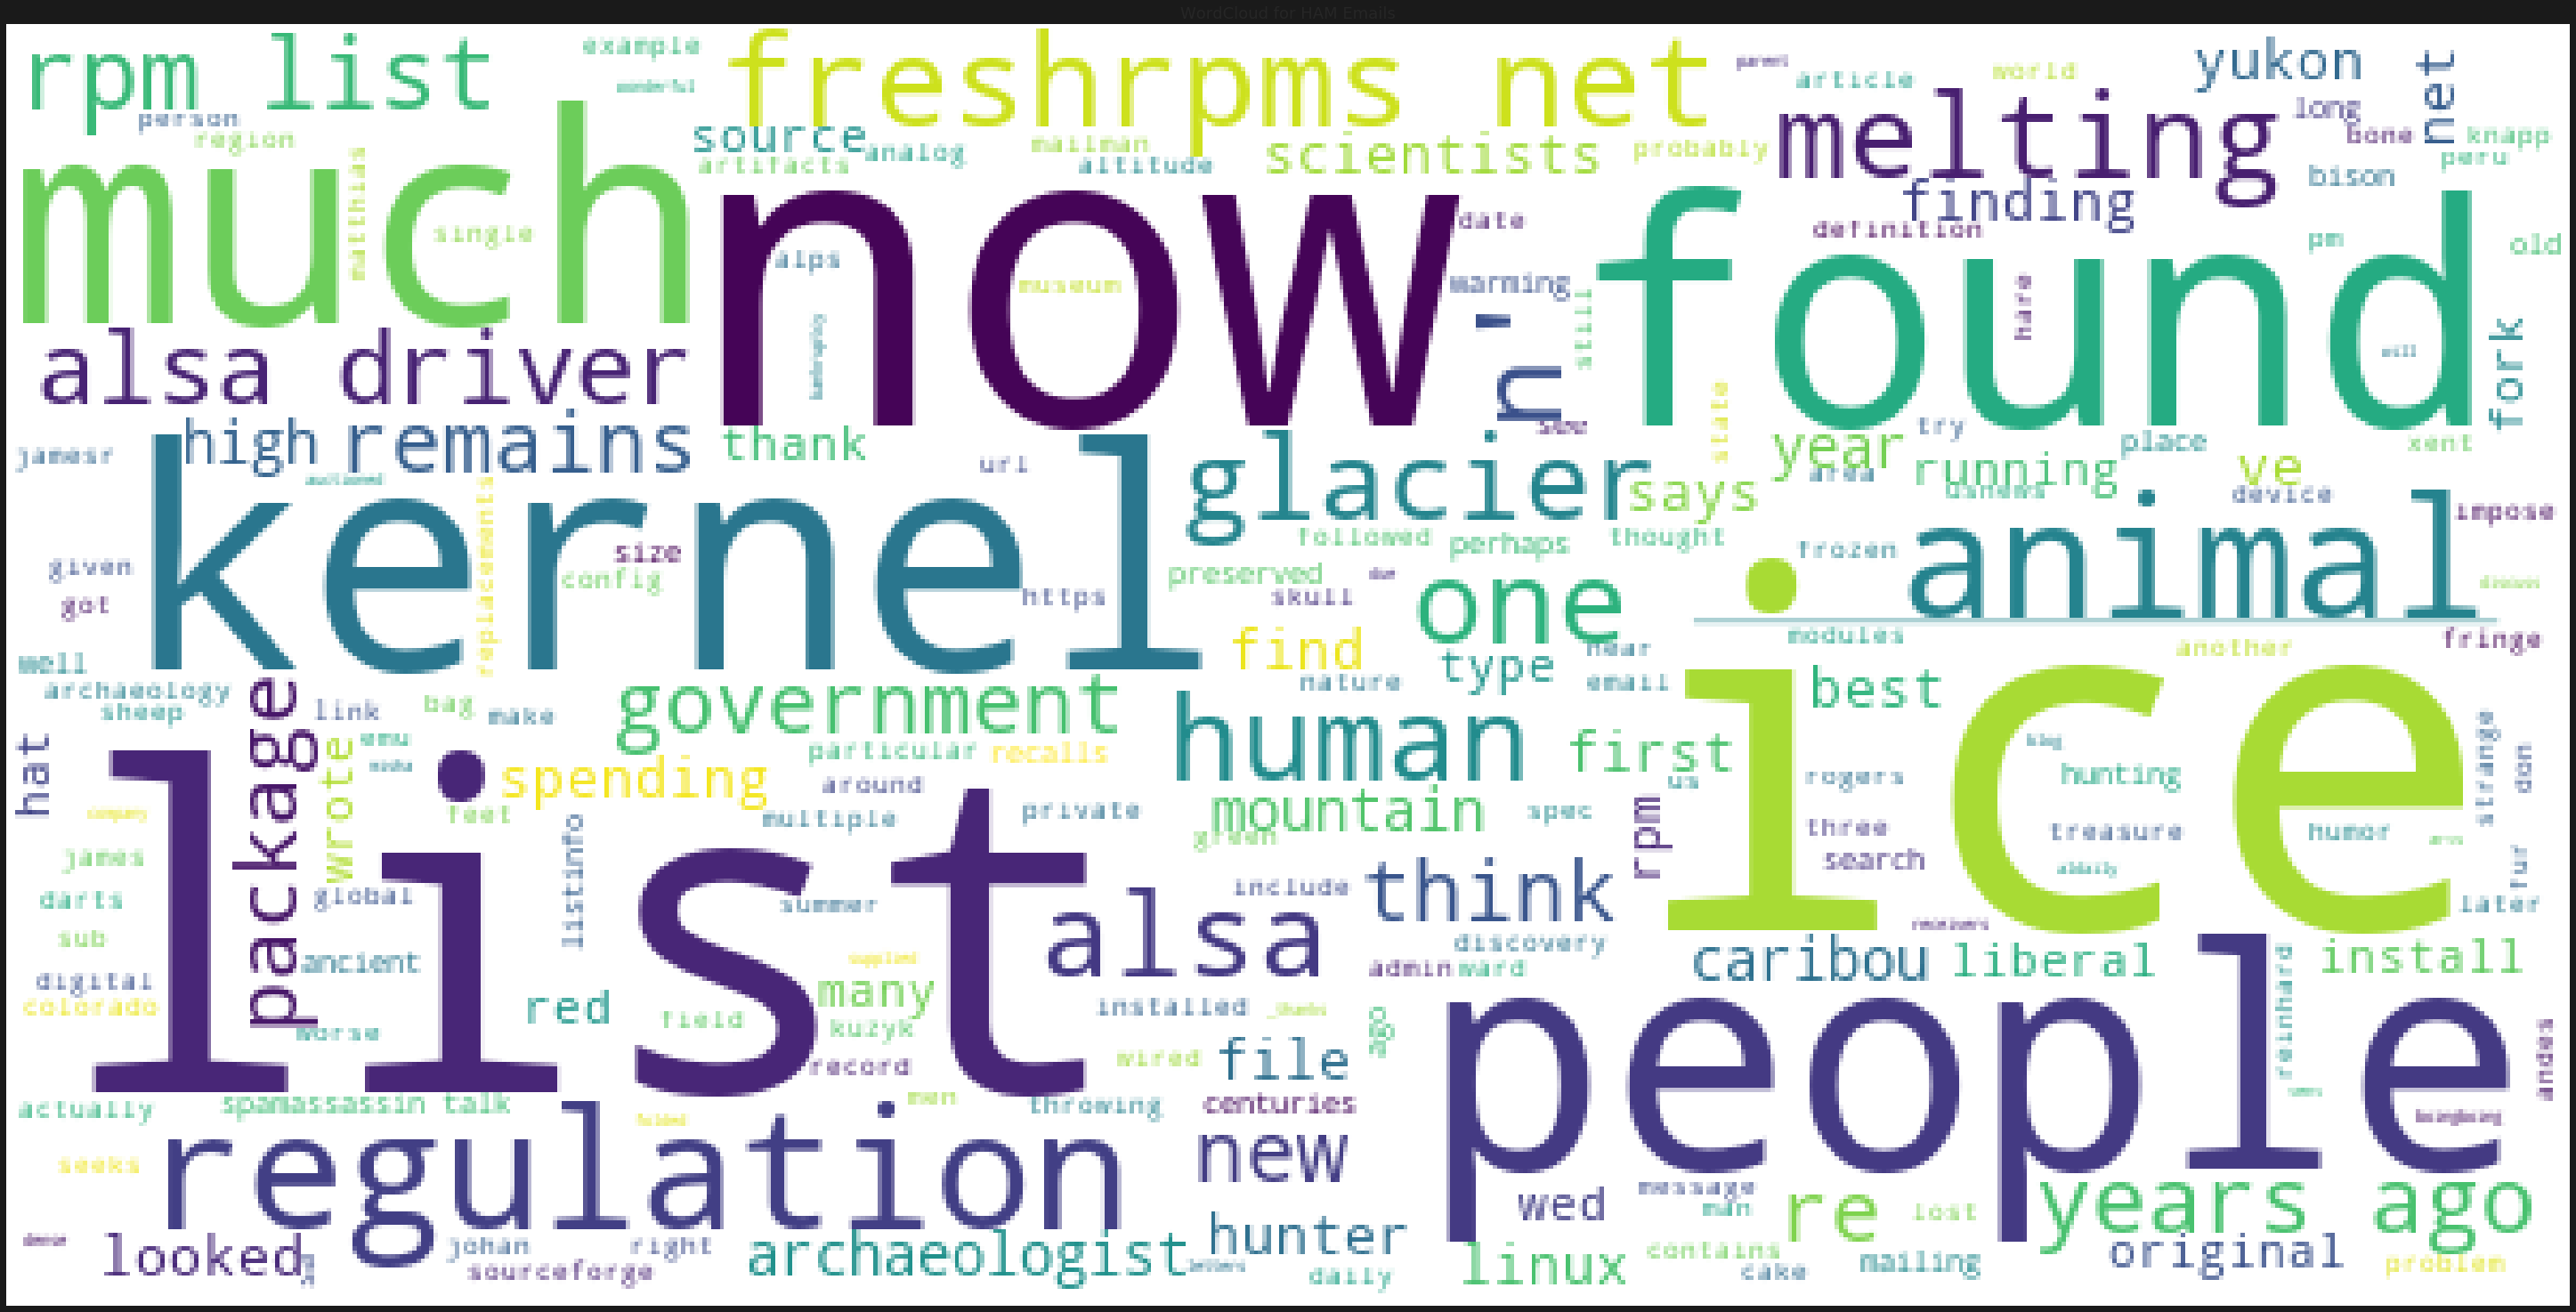

In [72]:
# Write your description (2-3 sentences) as a comment here:
# For my visualization, I decided to make a WordCloud in order to visualize which words come up frequently in spam
# versus ham emails. The frequent words are demonstrated by bigger fonts. The single plot I am submitting for this
#question is the second plot showing the frequency of words in ham emails. We see words, such as "now" and 
#"list" frequently used. These helped me when determining what words to include as my features.

# Write the code to generate your visualization here:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

og = original_training_data.iloc[:, :4]
#og['email'] = og['email'].str.replace('http\S+|www.\S+', '', case=False)
spam_og = og[og['spam']==1]
ham_og = og[og['spam']==0]

spam_words = spam_og.email.values
ham_words = ham_og.email.values

spam_wc = WordCloud(
    width = 600,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(spam_words))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(spam_wc) 
plt.axis('off')
plt.title('WordCloud for SPAM Emails')
plt.tight_layout(pad=0)
ham_wc = WordCloud(
    width = 600,
    height = 300,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(ham_words))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(ham_wc) 
plt.axis('off')
plt.title('WordCloud for HAM Emails')
plt.tight_layout(pad=0)

plt.show()
# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
#plt.show()

# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [69]:
#COUNT
import re

test['email len'] = test['email'].str.len()
test['email len squared'] = test['email len'] ** 2 
test['word spam'] = test['email'].str.count('spam') / len(test['email'])

def count_all(df, col, word):
    df[word] = df[col].str.count(word) / len(df['email'])
    
for w in range(len(words)):
    count_all(test, 'email', words[w])  
    
for p in range(len(punctuation)):
    count_all(test, 'email', punctuation[p])
    
test['subj upper case'] = test['subject'].str.findall(r'[A-Z]').str.len() 

for r in range(len(rf)):
    count_all(test, 'subject', rf[r])


original_training_data.head(2)

,id,subject,email,spam,email len,email len squared,word spam,3d,http,www,...,_,@,$,subj upper case,RE,Re,re,FW,Fw,fw
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0,359,128881,0.0,0.0,0.000359,0.00024,...,0.00024,0.0,0.00024,4,0.0,0.0,0.00000,0.0,0.0,0.0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0,278,77284,0.0,0.0,0.000240,0.00012,...,0.00000,0.0,0.00024,6,0.0,0.0,0.00012,0.0,0.0,0.0


In [61]:
X_test = test.iloc[:, 3:]
X_test.head(2)

,email len,email len squared,word spam,3d,http,www,font,href,border,width,...,_,@,$,subj upper case,RE,Re,re,FW,Fw,fw
0,11703,136960209,0.0,0.0,0.006,0.004,0.0,0.0,0.0,0.0,...,0.406,0.002,0.002,12,0.0,0.0,0.0,0.0,0.0,0.0
1,773,597529,0.0,0.0,0.003,0.000,0.0,0.0,0.0,0.0,...,0.000,0.000,0.002,7,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
norm_test = normalize(X_test)
test_predictions = my_model.predict(norm_test)
test_predictions

t = pd.DataFrame(test_predictions)
t[0].value_counts()

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    740
1    260
Name: 0, dtype: int64

In [63]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [64]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-27T14:40:26.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...
Saved proj2b.pdf


<IPython.core.display.Javascript object>